# From raw data to meaningful features
### Semakula Abdumajidhu
***23 Oct 2020***


First we import the plotting and numerical libraries.

In [134]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np


Populating the interactive namespace from numpy and matplotlib


## Start with toy data for classification

Let us consider the task of extracting features for some data that are meant to be used for classification.

So, before anything, let's start revising the code for K-Nearest Neighbours algorithm.

In [135]:
#  CODE for NN:
def knn(Y_training, labels_training, y_test, k):
    from scipy.spatial import distance
    from operator import itemgetter
    
    # distance_test_to_train[i] says what's the distance of the i-the training point to the y_test
    distance_test_to_train = []
    for i in range(Y_training.shape[0]):
        distance_test_to_train.append(distance.euclidean(Y_training[i,:], y_test))
    # The following list sorts the index of the distance list
    sorted_dist_indexes = np.argsort(distance_test_to_train)
    
    # The indexes we want to return are only the top k 
    indexes = sorted_dist_indexes[0:k]
    
    # Test label is the najority of neighbours' labels
    label_test = max(set(labels_training[indexes]), key=labels_training[indexes].tolist().count)
    
    return label_test, indexes, distance_test_to_train



After we implement a new functionality in our code, it is very important to test it and verify that it's doing what we think it's doing. The simplest way to do that, is to construct some fake data and run the newly constructed function of them. Since it's our own fake data, we know the correct answer that the function should give, so we can compare that to what the code returns.

We'll test the knn function. For this we'll need to create some training data called for example: `my_Y_training`, associated with some labels: `my_labels_training`. Then, create some test instances `my_y_test` and test the code by calling:

`knn(my_Y_training, my_labels_training, my_y_test, 2)`. 

The last argument is the number of neighbours, here selecfted to 2, but try different values too.

[[ 0  1]
 [ 2  2]
 [10 15]
 [ 2  1]
 [ 2 15]
 [ 0  1]
 [ 8 14]
 [ 5  5]
 [ 6  2]
 [ 7  6]
 [ 4 10]
 [ 4  6]]


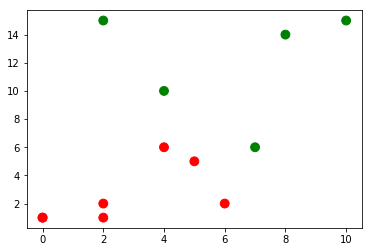

In [136]:
# Create toy data
my_Y_training = np.array([[0,1],[2,2],[10,15],[2,1],[2,15],[0,1],[8,14],[5,5],[6,2],[7,6],[4,10],[4,6]])
my_labels_training = np.array([0,0,1,0,1,0,1,0,0,1,1,0])
my_Y_test = np.array([[0,2], [9,12], [8,4],[6.5,6]])
print(my_Y_training)

# Create a list whose each element is the colour of each training point's class.
# It's read or green, depending if the label is 0 or 1.
colours=[('r' if i==0 else 'g') for i in my_labels_training]

# Do a plot of the points. Since the points are two-dimensional (two columns), 
# the scatter plot is going to be a 2D plot. 
plt.scatter(my_Y_training[:,0],my_Y_training[:,1],marker='o',s=78,c=colours)



Try different values for the number k below.

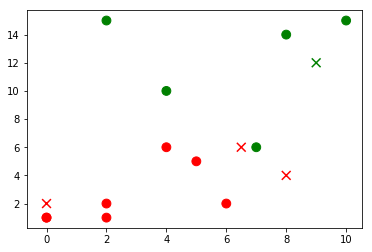

In [137]:
# Call the knn code for each test instance and get back the label. All test inferred labels are collecfted into a list.
labels_test = [knn(my_Y_training, my_labels_training, my_Y_test[i:i+1,:],k)[0] for i in range(my_Y_test.shape[0])]
# Repeat the scatter plot of above, just to have all points (test and training) together
plt.scatter(my_Y_training[:,0],my_Y_training[:,1],marker='o',s=78,c=colours)

colours=[('r' if i==0 else 'g') for i in labels_test]
# Create a scatter plot where test data are denoted by 'x' and have clour green or red, according to what label they were assigned.
plt.scatter(my_Y_test[:,0],my_Y_test[:,1],marker='x',s=78,c=colours)




Re-doing the same test as above but with 3 dimensional data.

[[ 0  1  2]
 [ 2  2  4]
 [10 15 30]
 [ 2  1  2]
 [ 2 15 30]
 [ 0  1  2]
 [ 8 14 28]
 [ 5  5 10]
 [ 6  2  4]
 [ 7  6 12]
 [ 4 10 20]
 [ 4  6 12]]
[0, 1, 0, 0]


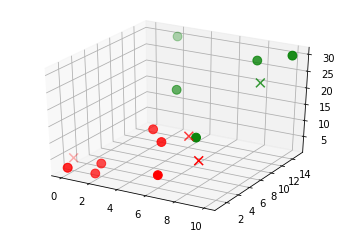

In [138]:
# Same as above but in 3 dimensions.
from mpl_toolkits.mplot3d import Axes3D

# TODO-----

my_Y_training = np.array([[0,1,2],[2,2,4],[10,15,30],[2,1,2],[2,15,30],[0,1,2],[8,14,28],[5,5,10],[6,2,4],[7,6,12],[4,10,20],[4,6,12]])
my_labels_training = np.array([0,0,1,0,1,0,1,0,0,1,1,0])
my_Y_test = np.array([[0,2,4], [9,12,24], [8,4,8],[6.5,6,12]])
#-------

print(my_Y_training)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colours=[('r' if i==0 else 'g') for i in my_labels_training]
ax.scatter(my_Y_training[:,0],my_Y_training[:,1],my_Y_training[:,2],marker='o',s=78,c=colours)

k=2 # TODO: Also try with 1
labels_test = [knn(my_Y_training, my_labels_training, my_Y_test[i:i+1,:],k)[0] for i in range(my_Y_test.shape[0])]
print(labels_test)
colours=[('r' if i==0 else 'g') for i in labels_test]
ax.scatter(my_Y_test[:,0],my_Y_test[:,1],my_Y_test[:,2],marker='x',s=78,c=colours)


Now we'll test feature selection. For this, we'll need a dataset with many features per instance (i.e. `Y` will have many columns, here we'll try 5). We'll investigate how the results change as we consider different subsets of features to use.

First, we'll create some toy data as before. 

In [139]:
# Data
my_Y_training = np.array([[0,1,0,2,6],[2,2,0,2,1],[10,8,0.0001,11,1],[2,1,0,2,12],[2,15,0.001,9,1],[0,1,0,8,11],[8,14,0.0001,10,6]])
my_labels_training = np.array([0,0,1,0,1,0,1])
my_Y_test = np.array([[0,2,0,3,6], [9,12,0,8,6], [8,4,0,8,6]])

Now we need to decide:
1. How many features to use?
2. Which features?

There are many methods to do that. Here we'll explore some very basic ones.

The simplest and more intuitive, is to select features by interacting with our data. Remember, the feature-selection procedure must be carried out by considering what **task** we have in mind (in our case, classification). Therefore, we'll first just plot our data alongside the labels

Text(0.5, 1.05, 'Labels')

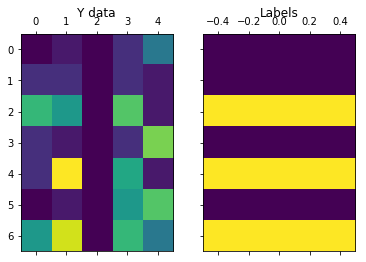

In [140]:
fig, axes = plt.subplots(1,2,sharey=True)

axes[0].matshow(my_Y_training,aspect='auto')
axes[1].matshow(my_labels_training[:,None],aspect='auto')
axes[0].set_title('Y data')
axes[1].set_title('Labels')


When we have a truly large number of features to consider, it'll be diffult to rely on visualisation. However, we can still get a data summary by writing some code.

Firstly, from the above plot we see that feature in column 2 is almost constant. This can be programmatically observed by computing the variance across features:

In [141]:
print(my_Y_training.var(0))

[1.33877551e+01 3.42857143e+01 1.16326531e-07 1.44897959e+01
 1.91020408e+01]


Of course, we can't be sure that the infinitesimal variance around this feature is indeed neglectable. If we were doing unsupervised learning, i.e. we didn't have the label set with us, we'd probably reject this feature as it seems useless.

However, here we have the labels, so we can verify that this feature is "useless" by checking if it follows a pattern similar to the labels. Because it's hard to verify this from the above matrix, we can magnify the differences in this feature by re-normalizing it. This motivates the idea of re-normalizing all features to compare them to the label vector. Re-normalization means that we'll make all features be between 0 and 1.

In [142]:
my_Y_training_norm = np.zeros((my_Y_training.shape[0],my_Y_training.shape[1]))
for j in range(my_Y_training.shape[1]):
    tmp = my_Y_training[:,j]
    my_Y_training_norm[:,j] = (tmp - tmp.min(0)) / tmp.ptp(0)
    

Plot the normalized data and the label vector next to them.

Text(0.5, 1.05, 'Labels')

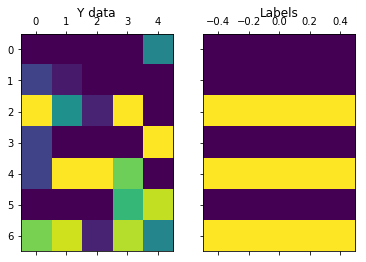

In [143]:
fig, axes = plt.subplots(1,2,sharey=True)

axes[0].matshow(my_Y_training_norm,aspect='auto')
axes[1].matshow(my_labels_training[:,None],aspect='auto')
axes[0].set_title('Y data')
axes[1].set_title('Labels')


Now we see that feature 2 is actually not that useless! It is slightly larger for data (rows of Y) that correspond to label 1.

Although we've discussed that usually combination of features (rather than just selecting one feature) is expected to give the best results, most of the code we wrote above focuses on looking at features individually.

Finding combination of features is more difficult, as the problem of considering all possible combinations makes the search space larger. We won't explore state-of-the-art methods here, but instead we'll just get a feeling as to what could be a good feature combination for our data by trying several subsets of features and measuring the classification accuracy on the test set (which in this case is rather a validation set).

## Fun with text data

Let's move away from toy data. We'll now look at more interesting data, namely text data. 
We'll create some fake texts. Each text is associated with a label which is 1 if the text is spam email, otherwise it has label 0.

In [144]:
text = dict()
# A vector so that labels[i] is 1 if the text is spam otherwise 0.
labels = [1,1,0,0,1,1,0]

text['0'] = ['this','email','is','a','spam','email']
text['1'] = ['spam','spam','spamity','spam']
text['2'] = ['this','email','is','about','python','and','python','example']
text['3'] = ['python','is','good','for','you','python','good']
text['4'] = ['you','should','not','learn','python']
text['5'] = ['this','email','is','bad','email','and','you','should','not']
text['6'] = ['this','is','a','good','email','good','as','it','can','get']

num_texts = len(text.keys())

# Concatenate all texts into a single big text. This will be helpful later.
texts = []
for tt in text.keys():
    texts += text[tt]
texts

['this',
 'email',
 'is',
 'a',
 'spam',
 'email',
 'spam',
 'spam',
 'spamity',
 'spam',
 'this',
 'email',
 'is',
 'about',
 'python',
 'and',
 'python',
 'example',
 'python',
 'is',
 'good',
 'for',
 'you',
 'python',
 'good',
 'you',
 'should',
 'not',
 'learn',
 'python',
 'this',
 'email',
 'is',
 'bad',
 'email',
 'and',
 'you',
 'should',
 'not',
 'this',
 'is',
 'a',
 'good',
 'email',
 'good',
 'as',
 'it',
 'can',
 'get']

In [145]:
# Find the unique words in all texts by looking at the unique elements of the big concatenated text.
uniques = np.unique(texts)
print(uniques)


['a' 'about' 'and' 'as' 'bad' 'can' 'email' 'example' 'for' 'get' 'good'
 'is' 'it' 'learn' 'not' 'python' 'should' 'spam' 'spamity' 'this' 'you']


We now have a list of all the unique words appearing in our text collection.

Many of the words are very simple, like 'a', 'I' etc. We'd like to get rid of them. Why? Because we assume that they're so simple and versatile that they can't offer much statistical insight into the nature of the text.

This process is called stemming.

In [146]:
# Define the dictionary of words that you wish to ignore from your texts
stemming_list = ['a','the','for','and','is','I','you','he','she','it','they']
# Helper variable, just get the unique words and transform them to list
uniques_list = uniques.tolist()
for i in range(len(stemming_list)): 
    try:
        # Remove the i-th word if it is in the stemming list
        uniques_list.remove(stemming_list[i])
    except ValueError:
        pass
# Now turn the list of uniques (stemmed) back into an array
uniques = np.array(uniques_list)
print(uniques)

['about' 'as' 'bad' 'can' 'email' 'example' 'get' 'good' 'learn' 'not'
 'python' 'should' 'spam' 'spamity' 'this']


In [147]:
# Sanity check: Print the first text
tmp = text['0']
print(tmp)


['this', 'email', 'is', 'a', 'spam', 'email']


## Features from Text: Creating a histogram - Bag of Words

Here's one possible answer to Q10: We'll create features from text, by  making a histogram in a manner which is called a **Bag of Words**.

A Bag of Words means that you'll convert each text into a **fixed sized** vector $[w_1, w_2, ... w_d]$, where $d$ is the total number of different words you may encounter, and $w_i$ tells us how many times this particular word appeared in the text. 

In [148]:
text_hist = np.zeros((num_texts,len(uniques)))
for i in range(num_texts):
    for j in range(len(uniques)):
        for k in range(len(text[str(i)])):
            if text[str(i)][k] == uniques[j]:
                text_hist[i,j]+=1
print(text_hist)

[[0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 2. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 2. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0. 1. 2. 0. 0. 0. 0. 0. 0. 1.]]


Some features appear only once, e.g. those in the first four columns. 
We can't do much statistical inference if these features appear only in one instance. Hence, we'll remove them.

In [149]:
inds = np.where(text_hist.sum(0) > 1)[0]
text_hist = text_hist[:,inds]
uniques = uniques[inds]

Now we'll plot the (remaining) features alongside the labels.

Text(0.5, 1.2, 'Data Labels')

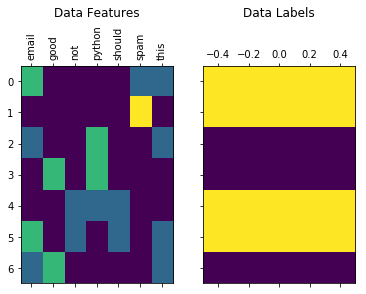

In [150]:
fig, axes = plt.subplots(1,2,sharey=True)
axes[0].matshow(text_hist, interpolation='none',aspect='auto')
axes[0].set_xticklabels(['']+uniques.tolist(),rotation='vertical');
axes[0].set_title('Data Features',y=1.2)
axes[1].matshow(np.array(labels)[:,None], aspect='auto')
axes[1].set_title('Data Labels',y=1.2)

# images

### Computing SURF features (with openCV)

In [151]:
import cv2
img = cv2.imread('images/todler_road.jpg',0)

In [152]:
# Create the surf object. The parameter is the threshold, roughly controlling the sensitivity to edges.
#surf = cv2.SURF(300)
surf = cv2.xfeatures2d.SURF_create(800)
# Get the keypoints and descriptors for the image
(kp, des)    = surf.detectAndCompute(img,None)
# Check how many keypoints were found
print(len(kp))

32725


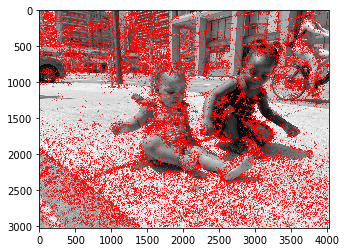

(<matplotlib.image.AxesImage at 0x2100ebdbf60>, None)

In [153]:
# Draw the keypoints on top of the image
img2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()

## Fun with Images

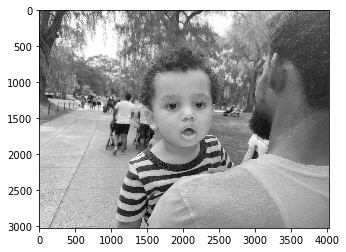

In [154]:
# If PIL is not installed, then only png can be read
img = np.array(imread('images/amaizing.jpg')) 

# Lazy conversion from RGB to grayscale
img = img[:,:,0]
plt.imshow(img,cmap=plt.get_cmap('gray'))


3024 4032


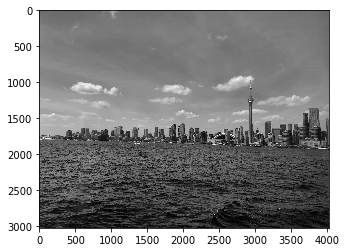

In [155]:
import glob

imagePath = 'images/sd/' # Path to images folder
extensions = 'jpg'

listing = glob.glob(imagePath + '*.' + extensions)
(height,width) = np.array(imread(listing[0],True))[:,:,0].shape
print(height,width)
images = np.array([imread(i,True)[:,:,0].flatten() for i in listing])

plt.imshow(images[0,:].reshape(height,width), cmap=plt.get_cmap('gray'))



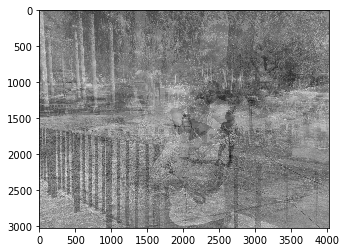

In [156]:
# Compute and plot the mean face
mu = np.mean(images,0)
plt.imshow(mu.reshape(height,width),cmap=plt.get_cmap('gray'))


In [157]:
# Center data
images_cent = images-mu

U,S,V = linalg.svd(images_cent.transpose(), full_matrices=False)

(4, 12192768)
(4, 12192768)


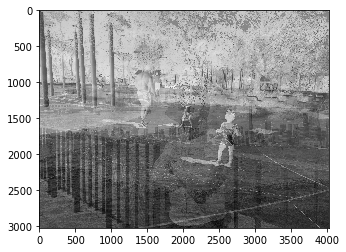

In [158]:
eigenfaces = U.T

print(images.shape)
print(eigenfaces.shape)

# Each row of U is an eigen-face
plt.imshow(eigenfaces[0,:].reshape(height,width),cmap=plt.get_cmap('gray'))

(4, 4) (4, 12192768) (4, 12192768)


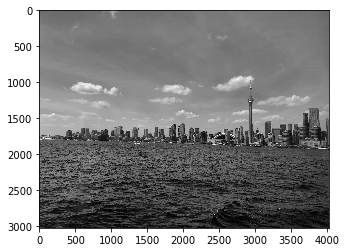

In [159]:
# Reconstruction
weights = np.dot(images_cent, eigenfaces.T)
print(weights.shape, eigenfaces.shape, images.shape)
j=0

img_j_reconstr = mu + np.dot(weights[j,:],eigenfaces)

plt.imshow(img_j_reconstr.reshape(height,width),cmap=plt.get_cmap('gray'))

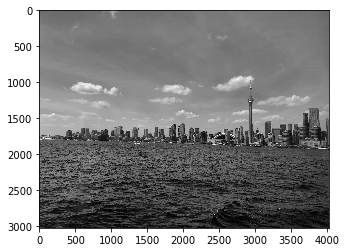

In [160]:
# Reconstruction by using fewer eigenfaces 
k=3
img_j_reconstr_k = mu + np.dot(weights[j,0:k], eigenfaces[0:k])
plt.imshow(img_j_reconstr_k.reshape(height,width),cmap=plt.get_cmap('gray'))